# Evaluación Parcial - CIFAR-100 con PyTorch
Este notebook implementa un MLP entrenado sobre el dataset CIFAR-100 con GPU.

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)


Usando dispositivo: cuda


In [7]:
# Transformaciones: convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.ToTensor(), #Convierte a tensor
    transforms.Normalize((0.5,), (0.5,)) #Normalizacion
])

# Cargar CIFAR-100
trainset = torchvision.datasets.CIFAR100(
    root='./data', train=True, download=True, transform=transform)

testset = torchvision.datasets.CIFAR100(
    root='./data', train=False, download=True, transform=transform)

# DataLoaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


In [8]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)  # Entrada: imagen 32x32 con 3 canales
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 100)  # Salida: 100 clases

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = MLP().to(device)
print(model)


MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=100, bias=True)
)


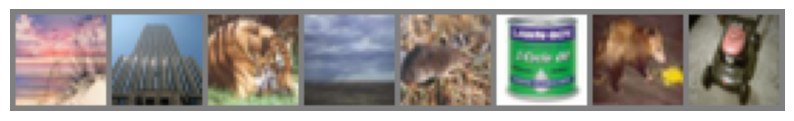

Etiquetas: ['sea', 'skyscraper', 'tiger', 'plain', 'shrew', 'can', 'possum', 'lawn_mower']


In [9]:
# Clases de CIFAR-100
classes = trainset.classes

# Función para mostrar imágenes
def imshow(img):
    img = img / 2 + 0.5  # desnormalizar
    npimg = img.numpy()
    plt.figure(figsize=(10, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Obtener algunas imágenes del dataloader
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Mostrar las imágenes
imshow(torchvision.utils.make_grid(images[:8]))
print('Etiquetas:', [classes[label] for label in labels[:8]])


In [10]:
# Definir función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento
num_epochs = 10
train_loss_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    
    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Reset gradientes
        optimizer.zero_grad()

        # Forward + backward + optimización
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader)
    train_loss_history.append(epoch_loss)
    print(f"Época {epoch+1}/{num_epochs}, Pérdida: {epoch_loss:.4f}")

print("Entrenamiento finalizado ✅")


Época 1/10, Pérdida: 3.7412
Época 2/10, Pérdida: 3.3511
Época 3/10, Pérdida: 3.1631
Época 4/10, Pérdida: 3.0155
Época 5/10, Pérdida: 2.8698
Época 6/10, Pérdida: 2.7402
Época 7/10, Pérdida: 2.6147
Época 8/10, Pérdida: 2.4772
Época 9/10, Pérdida: 2.3531
Época 10/10, Pérdida: 2.2338
Entrenamiento finalizado ✅


In [11]:
correct = 0
total = 0
model.eval()  # Modo evaluación

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}%")


Precisión en el conjunto de prueba: 24.41%


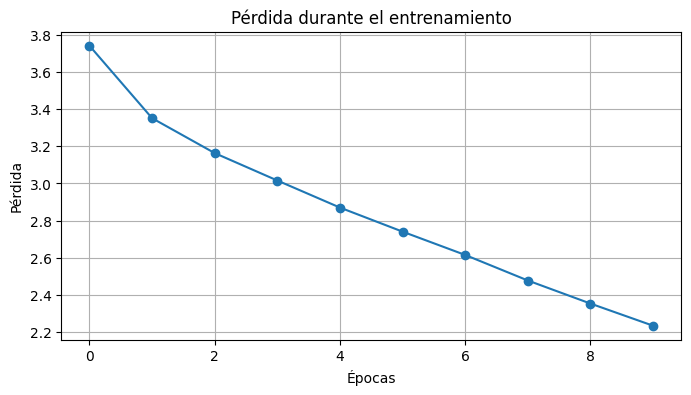

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(train_loss_history, marker='o')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()


In [13]:
# 🔁 Versión alternativa con batch size = 12
trainloader_v2 = DataLoader(trainset, batch_size=12, shuffle=True)
testloader_v2 = DataLoader(testset, batch_size=12, shuffle=False)


In [14]:
class MLP_2capas_2neuronas(nn.Module):
    def __init__(self):
        super(MLP_2capas_2neuronas, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3 * 32 * 32, 2)
        self.fc2 = nn.Linear(2, 2)
        self.fc3 = nn.Linear(2, 100)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [15]:
# 🧠 Usar el nuevo modelo
model_v2 = MLP_2capas_2neuronas().to(device)

# 🧮 Función de pérdida y optimizador
criterion_v2 = nn.CrossEntropyLoss()
optimizer_v2 = optim.Adam(model_v2.parameters(), lr=0.001)


In [16]:
epochs_v2 = 30
train_loss_history_v2 = []
train_accuracy_history_v2 = []

for epoch in range(epochs_v2):
    running_loss = 0.0
    correct = 0
    total = 0
    model_v2.train()

    for inputs, labels in trainloader_v2:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer_v2.zero_grad()
        outputs = model_v2(inputs)
        loss = criterion_v2(outputs, labels)
        loss.backward()
        optimizer_v2.step()

        running_loss += loss.item()
        
        # Cálculo de % de acierto
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader_v2)
    epoch_acc = correct / total

    train_loss_history_v2.append(epoch_loss)
    train_accuracy_history_v2.append(epoch_acc)

    print(f"[V2] Época {epoch+1}/{epochs_v2}, Pérdida: {epoch_loss:.4f}, Acierto: {epoch_acc*100:.2f}%")


[V2] Época 1/30, Pérdida: 4.5827, Acierto: 1.41%
[V2] Época 2/30, Pérdida: 4.4242, Acierto: 2.17%
[V2] Época 3/30, Pérdida: 4.3806, Acierto: 2.28%
[V2] Época 4/30, Pérdida: 4.3656, Acierto: 2.38%
[V2] Época 5/30, Pérdida: 4.3578, Acierto: 2.39%
[V2] Época 6/30, Pérdida: 4.3520, Acierto: 2.48%
[V2] Época 7/30, Pérdida: 4.3477, Acierto: 2.46%
[V2] Época 8/30, Pérdida: 4.3430, Acierto: 2.53%
[V2] Época 9/30, Pérdida: 4.3388, Acierto: 2.58%
[V2] Época 10/30, Pérdida: 4.3357, Acierto: 2.58%
[V2] Época 11/30, Pérdida: 4.3323, Acierto: 2.54%
[V2] Época 12/30, Pérdida: 4.3292, Acierto: 2.52%
[V2] Época 13/30, Pérdida: 4.3260, Acierto: 2.67%
[V2] Época 14/30, Pérdida: 4.3227, Acierto: 2.63%
[V2] Época 15/30, Pérdida: 4.3201, Acierto: 2.73%
[V2] Época 16/30, Pérdida: 4.3168, Acierto: 2.68%
[V2] Época 17/30, Pérdida: 4.3143, Acierto: 2.92%
[V2] Época 18/30, Pérdida: 4.3112, Acierto: 2.76%
[V2] Época 19/30, Pérdida: 4.3072, Acierto: 2.83%
[V2] Época 20/30, Pérdida: 4.3054, Acierto: 2.95%
[V2] Époc

In [17]:
correct_v2 = 0
total_v2 = 0
model_v2.eval()

with torch.no_grad():
    for inputs, labels in testloader_v2:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_v2(inputs)
        _, predicted = torch.max(outputs, 1)
        total_v2 += labels.size(0)
        correct_v2 += (predicted == labels).sum().item()

accuracy_v2 = 100 * correct_v2 / total_v2
print(f"[V2] Precisión en test: {accuracy_v2:.2f}%")


[V2] Precisión en test: 2.72%


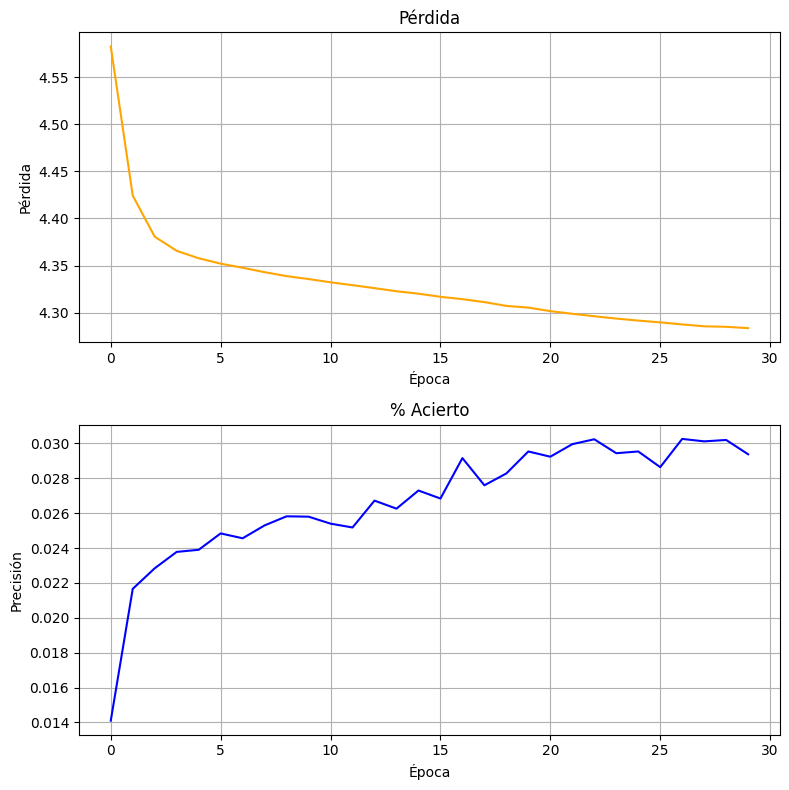

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Gráfico de pérdida
ax1.plot(train_loss_history_v2, label="Pérdida", color='orange')
ax1.set_title("Pérdida")
ax1.set_xlabel("Época")
ax1.set_ylabel("Pérdida")
ax1.grid(True)

# Gráfico de acierto
ax2.plot(train_accuracy_history_v2, label="% Acierto", color='blue')
ax2.set_title("% Acierto")
ax2.set_xlabel("Época")
ax2.set_ylabel("Precisión")
ax2.grid(True)

plt.tight_layout()
plt.show()


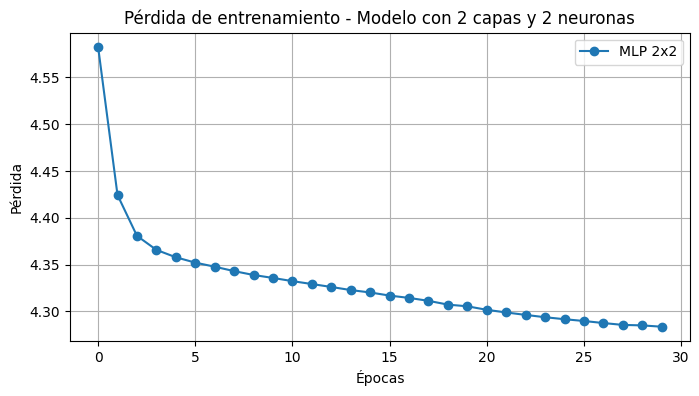

In [19]:
plt.figure(figsize=(8, 4))
plt.plot(train_loss_history_v2, label="MLP 2x2", marker='o')
plt.title("Pérdida de entrenamiento - Modelo con 2 capas y 2 neuronas")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch

# Transformación para imágenes externas
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # CIFAR-100 es de 32x32
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Lista de clases desde el dataset original
classes = trainset.classes

# Función para predecir una imagen externa
def predecir_imagen(ruta_imagen):
    imagen = Image.open(ruta_imagen).convert('RGB')
    entrada = transform(imagen).unsqueeze(0).to(device)

    model_v2.eval()
    with torch.no_grad():
        salida = model_v2(entrada)
        prediccion = salida.argmax(dim=1).item()

    plt.imshow(imagen)
    plt.axis('off')
    plt.title(f'Predicción: {classes[prediccion]}')
    plt.show()


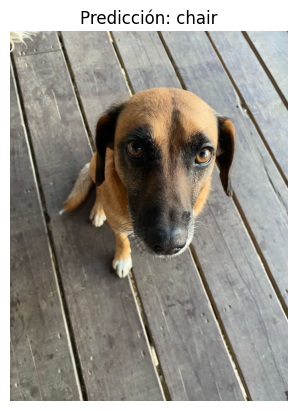

In [28]:
predecir_imagen("perro4.jpg")
